# dimenSNEon Tests

In [1]:
# First, ensure test data is downloaded
import sys, os

# TODO

In [1]:
# Load the data
import scanpy as sc
import dimensneon.tsne as dtsne
import anndata as ad
DATADIR = "data/filtered_feature_bc_matrix"
data = sc.read_10x_mtx(DATADIR, cache=True)
print("Loaded data!")

Loaded data!


In [2]:
# Normalize counts and get highly variable genes
sc.pp.normalize_per_cell(data, counts_per_cell_after=1e4)
sc.pp.log1p(data)
sc.pp.highly_variable_genes(data, n_top_genes=100)

In [28]:
# Arbitrarily limit to 5000 datapoints in the interest of speed
data_var = data[:, data.var['highly_variable']][0:1000, 0:1000]
sc.pp.neighbors(data_var) # computes neighborhood graphs. Needed to run clustering.
sc.tl.leiden(data_var) # clusters cells based on expression profiles. This is needed to color cells by cluster.

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [29]:
# Create two copies of the data. One for runing with builtin, one for running with dimensneon.

data_builtin = data_var.copy()
data_dsne = data_var

/home/aaron/Projects/dimensneon/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


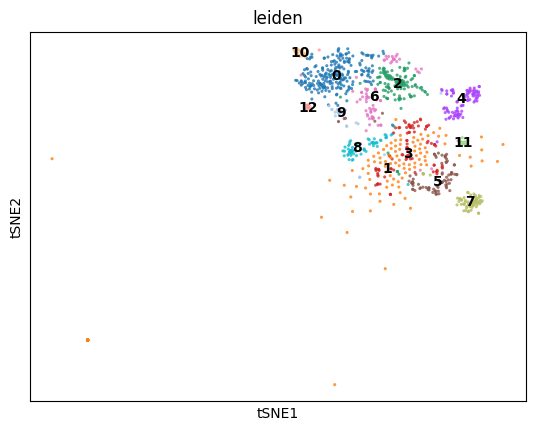

In [30]:
# Run the builtin scanpy tSNE and graph it
sc.tl.tsne(data_builtin)
sc.pl.tsne(data_builtin, color=['leiden'], legend_loc='on data', legend_fontsize=10, alpha=0.8, size=20)

Calculating squared Euclidean distances... Done!


/home/aaron/Projects/dimensneon/dimensneon/tsne.py:82: RuntimeWarning: invalid value encountered in divide
  :param X: A numpy array of datapoints.
/home/aaron/Projects/dimensneon/dimensneon/tsne.py:85: RuntimeWarning: divide by zero encountered in log
  
/home/aaron/Projects/dimensneon/dimensneon/tsne.py:85: RuntimeWarning: invalid value encountered in divide
  


Calculating variances (1000/1000)... Done!


/home/aaron/Projects/dimensneon/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


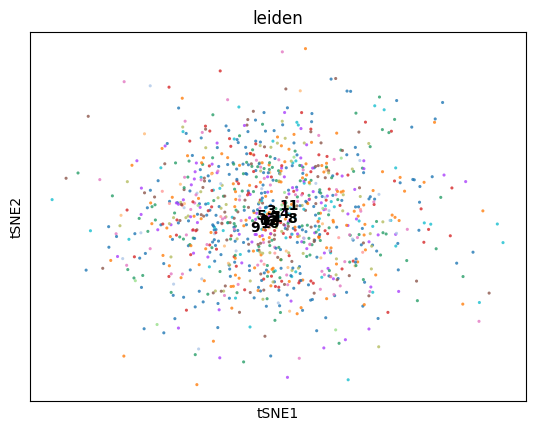

In [41]:
import importlib
importlib.reload(dtsne)
dtsne.tsne(data_dsne)
sc.pl.tsne(data_dsne, color=['leiden'], legend_loc='on data', legend_fontsize=10, alpha=0.8, size=20)